<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
LÊ THỊ DIỄM MY

# Day 1̉6: Gram Matrix in Style transfer
---

Set up Gram Matrix by using Numpy

In [ ]:
import numpy as np

def compute_gram_matrix(feature_map: np.ndarray) -> np.ndarray:
  """
  Compute Gram Matrix from feature map
  Args: feature_map(np.ndarray) matrix size (C, H, W)
  Returns: (np.ndarray) Gram matrix size (C, C)
  """
  # Get size of input
  C, H, W = feature_map.shape

  # Convert matrix to shape (C, H*W)
  F = feature_map.reshape(C, H*W)

  # Calculate Gram Matrix G = F <dot product> F.T
  G = np.dot(F, F.transpose())

  # Normalise by pixel count
  G = G / float(H * W)

  return G

In [ ]:
# Generate data set with size (3, 4, 4)
np.random.seed(42)
feature_map = np.random.rand(3, 4, 4)

# Compute Gram Matrix
grand_matrix = compute_gram_matrix(feature_map)

# Print result
print(f"Compute Gram Matrix: \n{grand_matrix}")

Compute Gram Matrix: 
[[0.33432857 0.2207897  0.27598961]
 [0.2207897  0.19580158 0.19452994]
 [0.27598961 0.19452994 0.32603015]]


Set up Gram Matrix by using Pytorch

In [ ]:
import torch
import numpy as np

def compute_gram_matrix_torch(feature_map: np.ndarray):
  feature_map_torch = torch.tensor(feature_map, dtype=torch.float32)
  F_torch = feature_map_torch.view(3, -1)
  grand_matrix_torch = torch.mm(F_torch, F_torch.t()) / (4 * 4)
  return grand_matrix_torch

In [ ]:
# Generate data set with size (3, 4, 4)
np.random.seed(42)
feature_map = np.random.rand(3, 4, 4)

grand_matrix_torch = compute_gram_matrix_torch(feature_map)
print(f"\n Gram Matrix Pytorch:\n {grand_matrix_torch.numpy()}")


 Gram Matrix Pytorch:
 [[0.33432856 0.2207897  0.2759896 ]
 [0.2207897  0.19580159 0.19452995]
 [0.2759896  0.19452995 0.32603014]]


## Exercise 1:

In [ ]:
feature_map = np.array([
    [[1, 2], [3, 4]], # channel 1
    [[5, 6], [7, 8]], # channel 2
    [[9, 10], [11, 12]] # channel 3
])

grand_matrix = compute_gram_matrix(feature_map)
print(grand_matrix)

[[  7.5  17.5  27.5]
 [ 17.5  43.5  69.5]
 [ 27.5  69.5 111.5]]


## Exercise 2:

In [ ]:
def compute_similarity(gram1: np.ndarray, gram2: np.ndarray) -> float:
  """
  Compute similarity between 2 Gram Matrix
  Args:
    gram1 (np.ndarray): Gram Matrix image 1
    gram2 (np.ndarray): Gram Matrix image 2
  Returns:
    float: Similarity between [0, 1]
  """
  numerator = np.sum(gram1 * gram2)
  denominator = np.sqrt(np.sum(gram1 * gram1)) * np.sqrt(np.sum(gram2 * gram2))
  similarity = numerator / denominator
  return similarity

In [ ]:
feature_map1 = np.array([
    [[1, 2], [3, 4]], # channel 1
    [[5, 6], [7, 8]], # channel 2
    [[9, 10], [11, 12]] # channel 3
])

feature_map2 = np.array([
    [[2, 4], [6, 8]], # channel 1
    [[1, 3], [5, 7]], # channel 2
    [[0, 2], [4, 6]] # channel 3
])

# Compute gram matrix
gram1 = compute_gram_matrix(feature_map1)
gram2 = compute_gram_matrix(feature_map2)

# Compute similarity
similarity = compute_similarity(gram1, gram2)
print(f"Similarity: {similarity:.2f}")

Similarity: 0.67


# Day 17: Getting Started with WandB


---



In [ ]:
# install
!pip install wandb

In [ ]:
!wandb login

wandb: Currently logged in as: lethidiemmy961996 (lethidiemmy961996-aivietnam-edu-vn) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


### Model Linear Regression

In [ ]:
import pandas as pd
import wandb

areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]

dataset = pd.DataFrame({
    'areas': areas,
    'prices': prices
})

In [ ]:
# forward
def predict(x, w, b):
  return w * x + b

# compute gradient
def gradient(y_hat, y, x):
  dw = 2 * x * (y_hat - y)
  db = 2 * (y_hat - y)

  return (dw, db)

# update weights
def update(w, b, lr, dw, db):
  w -= lr * dw
  b -= lr * db
  return w, b

In [ ]:
# init weights
b = 0.04
w = -0.34
lr = 0.01
epochs = 10

# init project wandb
wandb.init(
  # Set the project where this run will be logged
  project="demo-linear-regression",
  config={
      "learning_rate": lr,
      "epochs": epochs,
  },
)

In [ ]:
wandb.run.log({"Dataset" :  wandb.Table(dataframe=dataset)})

X_train = dataset['areas']
Y_train = dataset['areas']

N = len(X_train)

# parameters
losses = [] # for visualize, debug, evaluate model

for epoch in range(epochs):
  # for an epoch
  for i in range(N):
    # get a sample
    x = X_train[i]
    y = Y_train[i]

    # predict y_hat
    y_hat = predict(x, w, b)

    # compute loss
    loss = 0.5 * ((y_hat - y) ** 2)

    # tracking loss with wandb
    wandb.log({"loss": loss})

    # compute gradient
    dw, db = gradient(y_hat, y, x)

    # update weights
    w, b = update(w, b, lr, dw, db)

# Mark a run as finished, and finish uploading all data
wandb.finish()


loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.00055


Result:
- xlabel: computation step epochs x len(data)
- ylabel: loss value

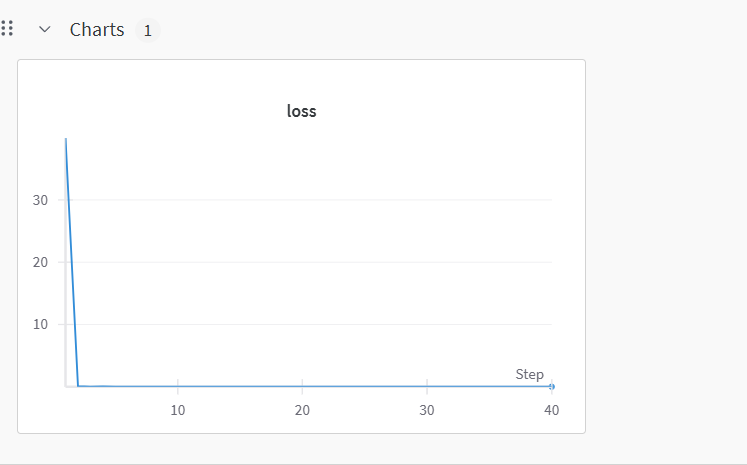

### Exercise

In [ ]:
import pandas as pd
import wandb

In [ ]:
# read csv file
df = pd.read_csv('advertising.csv')
# read head file
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
#1) Preprocess data
#   - Input features: tv, radio, newspaper
#   - Output feature(Label): sales
# Get data to use for training: get input features and output feature
def get_column(table, column_index):
  col_data =  np.array(table.iloc[:, column_index])
  return col_data

def normalize_data(col_data):
  data_norm =(col_data - np.min(col_data)) / (np.max(col_data) - np.min(col_data))
  return data_norm

In [ ]:
first_column = df.iloc[:,0]
first_column

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [ ]:
tv_data = np.array(first_column)
print(tv_data)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

In [ ]:
# after normalize
tv_norm = (tv_data - np.min(tv_data)) / (np.max(tv_data) - np.min(tv_data))
print(tv_norm)

[0.77578627 0.1481231  0.0557998  0.50997633 0.60906324 0.02705445
 0.19208657 0.4041258  0.02671627 0.67331755 0.2211701  0.72370646
 0.07811972 0.32735881 0.68785932 0.65843761 0.22691917 0.94927291
 0.2316537  0.49577274 0.73621914 0.80047345 0.04227257 0.76969902
 0.20831924 0.8867095  0.4808928  0.80960433 0.83902604 0.23638823
 0.98816368 0.37943862 0.32634427 0.89584038 0.32127156 0.98072371
 0.90023673 0.25025364 0.14338857 0.76868448 0.68244843 0.59621238
 0.99053094 0.69732837 0.08251606 0.58978695 0.30098072 0.80892797
 0.76597903 0.22387555 0.67331755 0.33716605 0.72945553 0.61515049
 0.88603314 0.67027393 0.02231992 0.4582347  0.71051742 0.71017924
 0.17855935 0.88129861 0.80689888 0.3449442  0.44098749 0.23097734
 0.10415962 0.4687183  0.80047345 0.73080825 0.67095029 0.36895502
 0.08826513 0.43523842 0.71931011 0.05478526 0.0906324  0.40514034
 0.01589449 0.38992222 0.25600271 0.80858979 0.25228272 0.22894826
 0.71964829 0.65099763 0.25566452 0.37199865 0.2962462  0.3689

In [ ]:
tv = get_column(df, 0)
radio = get_column(df, 1)
newspaper = get_column(df, 2)

sales = get_column(df, 3)

dataset_adsvertise = pd.DataFrame(
    {
        'tv' : tv,
        'radio' : radio,
        'newspaper' : newspaper,
        'sales' : sales
    }
)

In [ ]:
# Build functions
def predict_output(x1, x2, x3, w1, w2, w3, b):
  return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

def compute_gradient(x1, x2, x3, y, y_hat):
  dw1 = 2 * x1 * (y_hat - y)
  dw2 = 2 * x2 * (y_hat - y)
  dw3 = 2 * x3 * (y_hat - y)
  db = 2 * (y_hat - y)
  return dw1, dw2, dw3, db

def update_weights(w1, w2, w3, b, dw1, dw2, dw3, db, lr):
  w1 -= lr * dw1
  w2 -= lr * dw2
  w3 -= lr * dw3
  b -= lr * db
  return w1, w2, w3, b

In [ ]:
# Init model:
lr = 1e-5
epochs = 1000

# init project wandb
wandb.init(
  # Set the project where this run will be logged
  project="adsvertise-linear-regression",
  config={
      "learning_rate": lr,
      "epochs": epochs,
  },
)


In [ ]:
# Normalize data
X1 = normalize_data(tv)
X2 = normalize_data(radio)
X3 = normalize_data(newspaper)
Y = normalize_data(sales)

In [ ]:
# Training stage
wandb.run.log({"Dataset": wandb.Table(dataframe=dataset_adsvertise)})
N = len(tv) # all features have the same length
print(f"len = {N}")
losses = []
# init weights
b = 1
w1 = w2 = w3 = 0

for epoch in range(epochs):
  for i in range(N):
    # get feature for each row and predict each label corresponding
    x1 = X1[i]
    x2 = X2[i]
    x3 = X3[i]

    y = Y[i]

    y_hat = predict_output(x1, x2, x3, w1, w2, w3, b)

    loss = compute_loss(y_hat, y)
    losses.append(loss)

    dw1, dw2, dw3, db = compute_gradient(x1, x2, x3, y, y_hat)
    w1, w2, w3, b = update_weights(w1, w2, w3, b, dw1, dw2, dw3, db, lr)
  avg_loss = np.sum(losses) / len(losses)
  wandb.log({"Loss": avg_loss})

# Mark a run as finished, and finish uploading all data
wandb.finish()

len = 200


Loss,██▇▇▆▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss,0.07236


Data Table

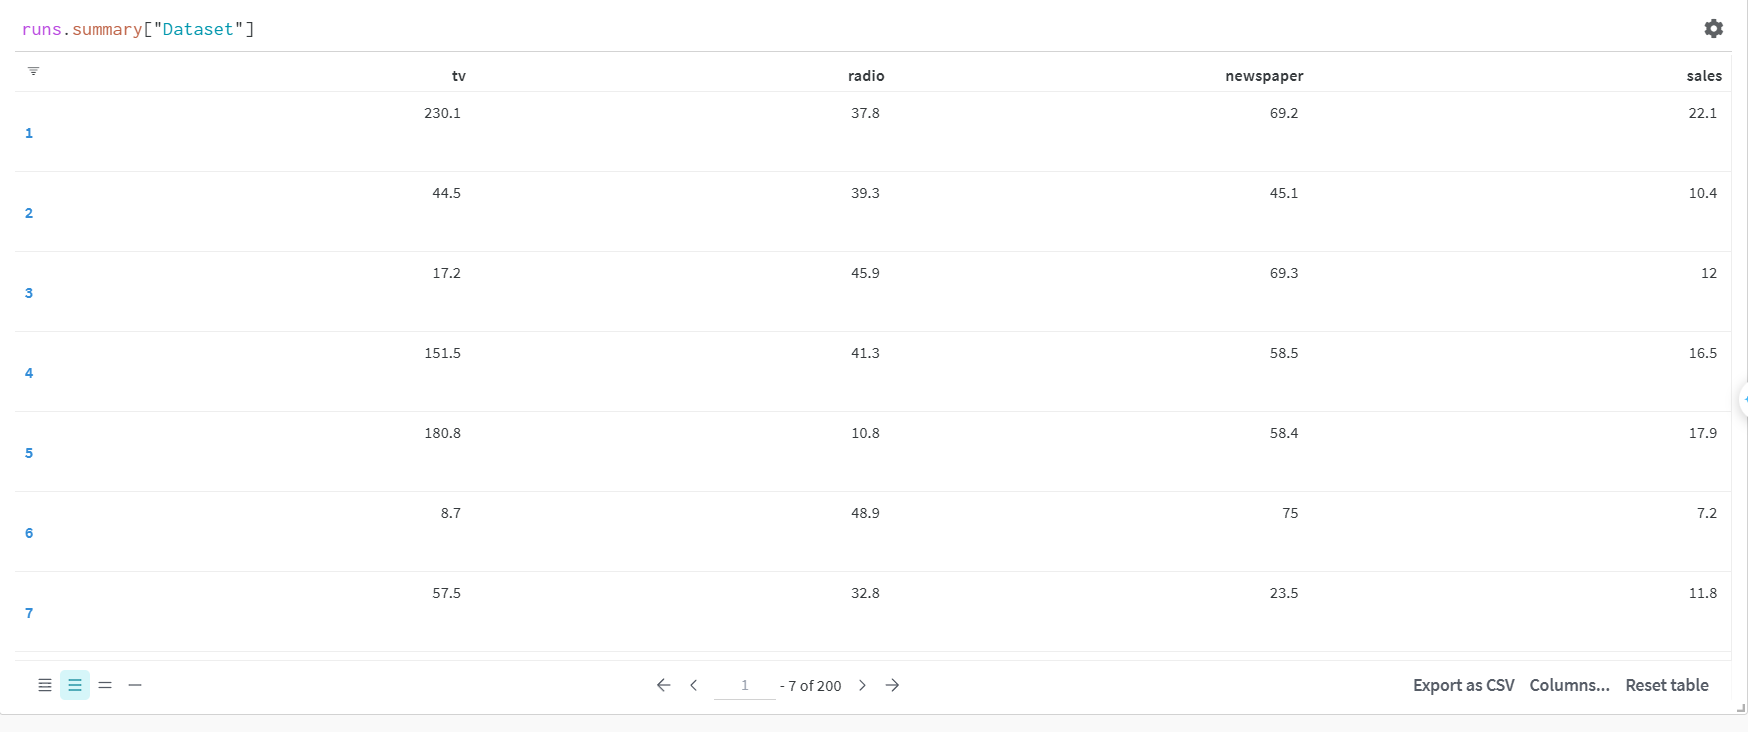

Result:
- xlabel: computation for each epochs
- ylabel: loss value

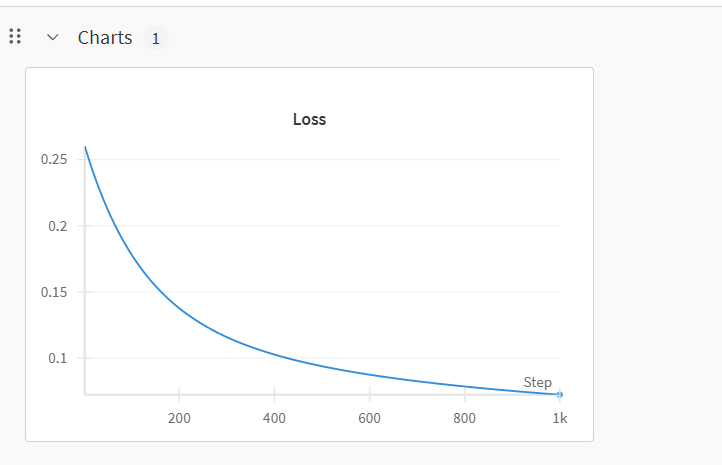

# Day 18

### OOP

In [ ]:
class Animal:
  def __init__(self, name):
    self.name = name

  def make_sound(self):
    return " Some generic sound"

# create instance
dog = Animal("Buddy")
print(dog.name)
print(dog.make_sound())

Buddy
 Some generic sound


In [ ]:
# Encapsulation
class BankAccount:
  def __init__(self, owner, balance) -> None:
    self.owner = owner
    self.balance = balance

  def deposit(self, amount):
    self.balance += amount
    return f"Deposited {amount}, New balance: {self.balance}"

account = BankAccount("Alice", 1000)
print(account.deposit(500))

Deposited 500, New balance: 1500


In [ ]:
# Inheritance
class Dog(Animal):
  def make_sound(self):
    return "Woof! Woof!"

dog = Dog("Max")
print(dog.make_sound())

Woof! Woof!


In [ ]:
# Polymorphism
class Cat(Animal):
  def make_sound(self):
    return "Moew! Moew!"

animals = [Dog("Buddy"), Cat("Whiskers")]
for animal in animals:
  print(f"{animal.name} says {animal.make_sound()}")

Buddy says Woof! Woof!
Whiskers says Moew! Moew!


In [ ]:
# Abstraction
from abc import ABC, abstractmethod
class Vehicle(ABC):
  def move(self):
    pass

class Car(Vehicle):
  def move(self):
    return "Car is moving on the road"

class Boat(Vehicle):
  def move(self):
    return "Boat is sailing on the water"

car = Car()
boat = Boat()

print(car.move())
print(boat.move())

Car is moving on the road
Boat is sailing on the water


### Exercise 1

In [ ]:
class Manufacturer:
  def __init__(self, identity, location) -> None:
    self.identity = identity
    self.location = location

  def describe(self):
    print(f"Identity : {self.identity} - Location:{self.location}")

In [ ]:
class Device(Manufacturer):
  def __init__(self, identity, location, name, price) -> None:
    super().__init__(identity, location)
    self.name = name
    self.price = price

  def describe(self):
    super().describe()
    print(f"Name : {self.name} - Price:{self.price}")

In [ ]:
device1 = Device(name="mouse", price=2.5, identity=9725, location="Viet Nam")
device1.describe()

Identity : 9725 - Location:Viet Nam
Name : mouse - Price:2.5


In [ ]:
device2 = Device(name="monitor", price=12.5, identity=11, location="Germany")
device2.describe()

Identity : 11 - Location:Germany
Name : monitor - Price:12.5


### Exercise 2

In [ ]:
class Person:
  def __init__(self, name:str, yob:int) -> None:
    self.name = name
    self.yob = yob

  def describe(self):
    print(f"Name: {self.name}, Year of Birth: {self.yob}")

class Student(Person):
  def __init__(self, name:str, yob:int, grade:str) -> None:
    super().__init__(name, yob)
    self.grade = grade

  def describe(self):
    super().describe()
    print(f"Grade: {self.grade}")

class Teacher(Person):
  def __init__(self, name: str, yob: int, subject:str) -> None:
    super().__init__(name, yob)
    self.subject = subject

  def describe(self):
    super().describe()
    print(f"Subject: {self.subject}")

class Doctor(Person):
  def __init__(self, name: str, yob: int, specialist:str) -> None:
    super().__init__(name, yob)
    self.specialist = specialist

  def describe(self):
    super().describe()
    print(f"Specialist: {self.specialist}")

In [ ]:
class Ward:
  def __init__(self, name:str) -> None:
    self.name = name
    self.people_lst = []

  def add_person(self, person):
    self.people_lst.append(person)

  def describe(self):
    print(f"Ward name: {self.name}")
    for person in self.people_lst:
        person.describe()

  def count_doctor(self):
    count = 0
    for person in self.people_lst:
      if isinstance(person, Doctor):
        count += 1
    return count

  def sort_age(self):
    pass

  def average_teacher_yob(self):
    teacher_lst = []
    for person in self.people_lst:
      if isinstance(person, Teacher):
        teacher_lst.append(person)
    sum_age = 0
    for i in range(len(teacher_lst)):
      sum_age += teacher_lst[i].yob
    return sum_age / len(teacher_lst)

In [ ]:
# Using
# Examples
# 2(a)
student1 = Student(name="studentA", yob=2010, grade="7")
student1.describe()

teacher1 = Teacher(name="teacherA", yob=1969, subject="Math")
teacher1.describe()

doctor1 = Doctor(name="doctorA", yob=1945, specialist="Endocrinologists")
doctor1.describe()

Name: studentA, Year of Birth: 2010
Grade: 7
Name: teacherA, Year of Birth: 1969
Subject: Math
Name: doctorA, Year of Birth: 1945
Specialist: Endocrinologists


In [ ]:
# 2(b)
print()
teacher2 = Teacher(name="teacherB", yob=1995, subject="History")
doctor2 = Doctor(name="doctorB", yob=1975, specialist="Cardiologists")
ward1 = Ward(name="Ward1")
ward1.add_person(student1)
ward1.add_person(teacher1)
ward1.add_person(teacher2)
ward1.add_person(doctor1)
ward1.add_person(doctor2)
ward1.describe()


Ward name: Ward1
Name: studentA, Year of Birth: 2010
Grade: 7
Name: teacherA, Year of Birth: 1969
Subject: Math
Name: teacherB, Year of Birth: 1995
Subject: History
Name: doctorA, Year of Birth: 1945
Specialist: Endocrinologists
Name: doctorB, Year of Birth: 1975
Specialist: Cardiologists


In [ ]:
#2(c)
print(f"\nNumber of doctors: {ward1.count_doctor()}")


Number of doctors: 2


In [ ]:
#2(d) ??? chua co lem!
print ("\nAfter sorting Age of Ward1 people")
ward1.sort_age()
ward1.describe()


After sorting Age of Ward1 people
Ward name: Ward1
Name: studentA, Year of Birth: 2010
Grade: 7
Name: teacherA, Year of Birth: 1969
Subject: Math
Name: teacherB, Year of Birth: 1995
Subject: History
Name: doctorA, Year of Birth: 1945
Specialist: Endocrinologists
Name: doctorB, Year of Birth: 1975
Specialist: Cardiologists


In [ ]:
#2(e)
print(f"\nAverage year of birth(teachers): {ward1.average_teacher_yob()}")


Average year of birth(teachers): 1982.0


### Exercise 3

In [ ]:
import numpy as np
class Stack:
  def __init__(self, capacity) -> None:
    self.capacity = capacity # length of stack array
    self.stack = []

  def is_empty(self):
    return len(self.stack) == 0

  def is_full(self):
    return len(self.stack) == self.capacity

  def pop(self):
    #top is the final element in array
    if not self.is_empty():
      value = self.stack.pop(len(self.stack) - 1)
      return value # Remove Success

  def push(self, value):
    if not self.is_full():
      self.stack.append(value)
      return True
    else:
      return False

  def top(self):
    if not self.is_empty():
      return self.stack[len(self.stack) - 1]
    else:
      return "Stack is empty!"

In [ ]:
from ast import Starred
stack1 = Stack(capacity=5)
stack1.push(1)
stack1.push(2)

print(stack1.is_full())

False


In [ ]:
print(stack1.top())

print(stack1.pop())

2
2


In [ ]:
print(stack1.top())

print(stack1.pop())

1
1


In [ ]:
print(stack1.is_empty())

True


### Exercise 4

In [ ]:
class Queue:
  def __init__(self, capacity) -> None:
    self.capacity = capacity
    self.queue = []

  def is_empty(self):
    return len(self.queue) == 0

  def is_full(self):
    return len(self.queue) == self.capacity

  def dequeue(self):
    #top is the first element in array
    if not self.is_empty():
      value = self.queue.pop(0)
      return value # Remove Success

  def enqueue(self, value):
    if not self.is_full():
      self.queue.append(value)
      return True
    else:
      return False

  def front(self):
    if not self.is_empty():
      return self.queue[0]
    else:
      return "Queue is empty!"

In [ ]:
queue1 = Queue(capacity=5)
queue1.enqueue(1)
queue1.enqueue(2)
print(queue1.is_full())

False


In [ ]:
print(queue1.front())
print(queue1.dequeue())

1
1


In [ ]:
print(queue1.front())
print(queue1.dequeue())

2
2


In [ ]:
print(queue1.is_empty())

True


### Multiple choice exercises

In [ ]:
#Q1:C Inheritance => D
#Q2: A =>
class Manufacturer :
  def __init__( self, identity:int, location:str ) :
    self.__identity = identity
    self.__location = location

  def describe(self) :
    print(f"Identity:{self.__identity} - Location:{self.__location}")

manu1 = Manufacturer ( identity =100 , location ='Vietnam')
manu1.describe()
#Q3: A =>
#Q4: B =>


Identity:100 - Location:Vietnam


In [ ]:
#Q5 A
from abc import ABC, abstractmethod
class Person(ABC):
  def __init__ (self, name:str, yob:int) :
    self._name = name
    self._yob = yob

  def getYoB ( self ) :
    return self._yob

  @abstractmethod
  def describe(self):
    pass

class Student(Person):
  def __init__(self, name:str, yob:int, grade:str) :
    super().__init__(name, yob)
    self.name = name
    self.yob = yob
    self.grade = grade


  def describe(self) :
    print(f"Name: {self.name} - Year of Birth: {self.yob} - Grade: {self.grade}")

student1 = Student(name="studentZ2023 ", yob=2011, grade="6")
student1.describe()


Name: studentZ2023  - Year of Birth: 2011 - Grade: 6


In [ ]:
#Q6  A
from abc import ABC, abstractmethod

class Person(ABC) :
  def __init__(self, name:str, yob:int) :
    self._name = name
    self._yob = yob

  def getYoB(self) :
    return self._yob

  @abstractmethod
  def describe(self):
    pass


class Teacher(Person) :
  def __init__(self, name:str, yob:int, subject:str) :
    self.name = name
    self.yob = yob
    self.subject = subject

  def describe(self):
    print(f"Teacher - Name: {self.name} - Year of Birth: {self.yob} - Subject: {self.subject}")

teacher1 = Teacher(name="teacherZ2023", yob=1991, subject="History")
teacher1.describe()

Teacher - Name: teacherZ2023 - Year of Birth: 1991 - Subject: History


In [ ]:
#Q7 A
from abc import ABC, abstractmethod

class Person ( ABC ) :
  def __init__ ( self , name :str , yob :int) :
    self . _name = name
    self . _yob = yob

  def getYoB ( self ) :
    return self . _yob

  @abstractmethod
  def describe ( self ) :
    pass


class Doctor(Person) :
  def __init__(self, name:str, yob:int, specialist:str) :
    self.name = name
    self.yob = yob
    self.specialist = specialist

  def describe(self):
    print(f"Teacher - Name: {self.name} - Year of Birth: {self.yob} - Specialist: {self.specialist}")

doctor1 = Doctor(name="doctorZ2023", yob=1981, specialist="Endocrinologists")
doctor1.describe()

Teacher - Name: doctorZ2023 - Year of Birth: 1981 - Specialist: Endocrinologists


In [ ]:
#Q8 A
# copy person above
class Person:
  def __init__(self, name:str, yob:int) -> None:
    self.name = name
    self.yob = yob

  def describe(self):
    print(f"Name: {self.name}, Year of Birth: {self.yob}")

class Student(Person):
  def __init__(self, name:str, yob:int, grade:str) -> None:
    super().__init__(name, yob)
    self.grade = grade

  def describe(self):
    super().describe()
    print(f"Grade: {self.grade}")

class Teacher(Person):
  def __init__(self, name: str, yob: int, subject:str) -> None:
    super().__init__(name, yob)
    self.subject = subject

  def describe(self):
    super().describe()
    print(f"Subject: {self.subject}")

class Doctor(Person):
  def __init__(self, name: str, yob: int, specialist:str) -> None:
    super().__init__(name, yob)
    self.specialist = specialist

  def describe(self):
    super().describe()
    print(f"Specialist: {self.specialist}")
#code
class Ward:
  def __init__(self, name:str) -> None:
    self.ward_name = name
    self.list_persons = []

  def add_person(self, person:Person):
    self.list_persons.append(person)

  def describe(self):
    print(f"Ward Name: {self.ward_name}")
    for person in self.list_persons:
      person.describe()
      print("")

student1 = Student(name="studentK-111", yob=2012, grade="5")
teacher1 = Teacher(name="teacherK-222", yob=1966, subject="Math")
doctor1 = Doctor(name="doctorK-333", yob=1965, specialist="Endocrinologists")
teacher2 = Teacher(name="teacherK-444", yob=1945, subject="History")
doctor2 = Doctor(name="doctorK-555", yob=1966, specialist="Cardiologists")
ward1 = Ward(name="ward11")
ward1.add_person(student1)
ward1.add_person(teacher1)
ward1.add_person(doctor1)
ward1.add_person(teacher2)
ward1.add_person(doctor2)
ward1.describe()

Ward Name: ward11
Name: studentK-111, Year of Birth: 2012
Grade: 5

Name: teacherK-222, Year of Birth: 1966
Subject: Math

Name: doctorK-333, Year of Birth: 1965
Specialist: Endocrinologists

Name: teacherK-444, Year of Birth: 1945
Subject: History

Name: doctorK-555, Year of Birth: 1966
Specialist: Cardiologists



In [ ]:
#Q9 A
class Stack:
  def __init__(self, capacity) -> None:
    self.capacity= capacity
    self.stack = []

  def is_empty(self):
    return len(self.stack) == 0

stack1 = Stack(capacity=5)
print(stack1.is_empty())

True


In [ ]:
#Q10 A
class Stack:
  def __init__(self, capacity) -> None:
    self.capacity= capacity
    self.stack = [1, 2, 3, 4, 5]

  def is_full(self):
    return len(self.stack) == self.capacity

stack1 = Stack(capacity=5)
print(stack1.is_full())

True


In [ ]:
#Q11 B
import numpy as np
class Stack:
  def __init__(self, capacity) -> None:
    self.capacity = capacity # length of stack array
    self.stack = []

  def is_full(self):
    return len(self.stack) == self.capacity

  def push(self, value):
    if not self.is_full():
      self.stack.append(value)
      return True
    else:
      return False

stack1 = Stack(capacity=5)
stack1.push(1)
stack1.push(2)
print(stack1.is_full())

False


In [ ]:
#Q12 B
import numpy as np
class Stack:
  def __init__(self, capacity) -> None:
    self.capacity = capacity # length of stack array
    self.stack = []

  def is_empty(self):
    return len(self.stack) == 0

  def is_full(self):
    return len(self.stack) == self.capacity

  def push(self, value):
    if not self.is_full():
      self.stack.append(value)
      return True
    else:
      return False

  def top(self):
    if not self.is_empty():
      return self.stack[len(self.stack) - 1]
    else:
      return "Stack is empty!"

stack1 = Stack(capacity=5)
stack1.push(1)
stack1.push(2)
print(stack1.top())

2


In [ ]:
#Q13 A
class Queue:
  def __init__(self, capacity) -> None:
    self.capacity = capacity
    self.queue = []

  def is_empty(self):
    return len(self.queue) == 0

  def is_full(self):
    return len(self.queue) == self.capacity
queue1 = Queue(capacity=5)
print(queue1.is_empty())

True


In [ ]:
#Q14 B
class Queue:
  def __init__(self, capacity) -> None:
    self.capacity = capacity
    self.queue = []

  def is_full(self):
    return len(self.queue) == self.capacity
queue1 = Queue(capacity=5)
print(queue1.is_full())

False


In [ ]:
#Q15 B
class Queue:
  def __init__(self, capacity) -> None:
    self.capacity = capacity
    self.queue = []

  def is_full(self):
    return len(self.queue) == self.capacity

  def enqueue(self, value):
    if not self.is_full():
      self.queue.append(value)
      return True
    else:
      return False
queue1 = Queue(capacity=5)
queue1.enqueue(1)
queue1.enqueue(2)
print(queue1.is_full())

False


In [ ]:
#Q16 A
class Queue:
  def __init__(self, capacity) -> None:
    self.capacity = capacity
    self.queue = []

  def is_empty(self):
    return len(self.queue) == 0

  def is_full(self):
    return len(self.queue) == self.capacity

  def dequeue(self):
    #top is the first element in array
    if not self.is_empty():
      value = self.queue.pop(0)
      return value # Remove Success

  def enqueue(self, value):
    if not self.is_full():
      self.queue.append(value)
      return True
    else:
      return False

  def front(self):
    if not self.is_empty():
      return self.queue[0]
    else:
      return "Queue is empty!"
queue1 = Queue(capacity=5)
queue1.enqueue(1)
queue1.enqueue(2)
print(queue1.front())

1


# Day 19

Linear Regression - LR have 2 type:
- Simple LR
- Multi LR

1) Predict output:
$$
Y_i = w_iX_i +b
$$

The purpose of model is find the optimize value for b and $w_i$. The method we use is Gradient descent.

Which:
- $Y_i$: output or prediction value
- w_i: weight
- b: bias

2) Cost or Loss funtion: model evaluation

- Mean Squared Error (MSE): sensitive to outliers
- Root Mean Squared Error (RMSE): has the same units as the output y. Easy to interpret, sensitive to outliers
- Mean Absolute Error (MAE): Less affected by outliers
- [R-squared Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=The%20coefficient%20of%20determination%2C%20or,values%20between%200%20and%201%20.) ($R^2$):

3) Back propagation: Compute gradient

4) Update parameters w and b

In [ ]:
!gdown 1zoQTToBtrUu9DWDb64CLq1Zu66NYTMKk

Downloading...
From: https://drive.google.com/uc?id=1zoQTToBtrUu9DWDb64CLq1Zu66NYTMKk
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 11.6MB/s]


In [104]:
import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self, learning_rate, epochs=1000) -> None:
    self.learning_rate = learning_rate
    self.weight = None
    self.bias = None
    self.epochs = epochs
    self.train_losses = []

  def predict(self, X):
    return np.dot(X, self.weight) + self.bias

  def compute_loss_MSE(self, predictions, Y):#evaluate
    return np.sum((Y - predictions)** 2)/ len(Y)

  def compute_gradient(self, X, Y, Y_hat):
    #
    loss = Y_hat - Y
    dw_i = X.T.dot(loss)/len(Y)
    db = np.sum(loss)/len(Y)
    cost = np.sum(loss**2)/(2*len(Y))
    return dw_i, db

  def update_parameters(self, dw_i, db):
    self.weight -= self.learning_rate * dw_i
    self.bias -= self.learning_rate * db

  def train(self, X, Y):
    m, n = X.shape
    self.w = np.zeros(n)
    self.bias = 0
    self.weight = np.zeros(n)
    for epoch in range(self.epochs):
      predictions = self.predict(X)

      loss = self.compute_loss_MSE(predictions, Y)

      self.train_losses.append(loss)
      if epoch % 50 == 0:
        print(f'Epoch {epoch} : cost = {loss}')
      dwi, db = self.compute_gradient(X, Y, predictions)
      self.update_parameters(dwi, db)
    self.plot_cost()

  def plot_regression_eval(self, X, y):
    plt.scatter (X, y, color =" blue ", label =" Data points ")
    y_pred = self.predict(X)
    plt.plot (X, y_pred, color =" red ", label =" Regression line ")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

  def plot_cost(self):
     plt.figure(figsize=(10,6))
     plt.plot(self.train_losses)
     plt.xlabel('Epoch')
     plt.ylabel('Cost')
     plt.title('Cost vs Epoch')
     plt.grid(True)
     plt.show()


In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('advertising.csv')
df.head()

# data_norm = (col_data - np.min(col_data)) / (np.max(col_data) - np.min(col_data))
X = np.array(df)[:, :3]
Y = np.array(df)[:, 3]

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, Y_train.shape)
print("Train shape:", type(X_train), type(Y_train))
print("Test shape:", X_test.shape, Y_test.shape)


Train shape: (160, 3) (160,)
Train shape: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Test shape: (40, 3) (40,)


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_data = df.drop(['Sales'], axis=1)
Y_data = df['Sales']

X_data = scaler.fit_transform(X_data)

print("Train shape:", X_data.shape, Y_data.shape)
print("Train shape:", type(X_data))
print("Train shape:", type(Y_data))
print("Train shape:", X_data, Y_data)

Train shape: (200, 3) (200,)
Train shape: <class 'numpy.ndarray'>
Train shape: <class 'pandas.core.series.Series'>
Train shape: [[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.

Epoch 0 : cost = 256.71195
Epoch 50 : cost = 95.2524463076927
Epoch 100 : cost = 36.522557360619196
Epoch 150 : cost = 15.092901342942255
Epoch 200 : cost = 7.253848380979869
Epoch 250 : cost = 4.379916117838805
Epoch 300 : cost = 3.3239500824550463
Epoch 350 : cost = 2.9349941382470592
Epoch 400 : cost = 2.7912882945859097
Epoch 450 : cost = 2.73798306732783
Epoch 500 : cost = 2.7181053003124283
Epoch 550 : cost = 2.7106395852533622
Epoch 600 : cost = 2.707808543912969
Epoch 650 : cost = 2.7067212621961985
Epoch 700 : cost = 2.7062967605915493
Epoch 750 : cost = 2.7061275741992183
Epoch 800 : cost = 2.7060584515390214
Epoch 850 : cost = 2.7060293968443045
Epoch 900 : cost = 2.706016802233569
Epoch 950 : cost = 2.7060111685507717


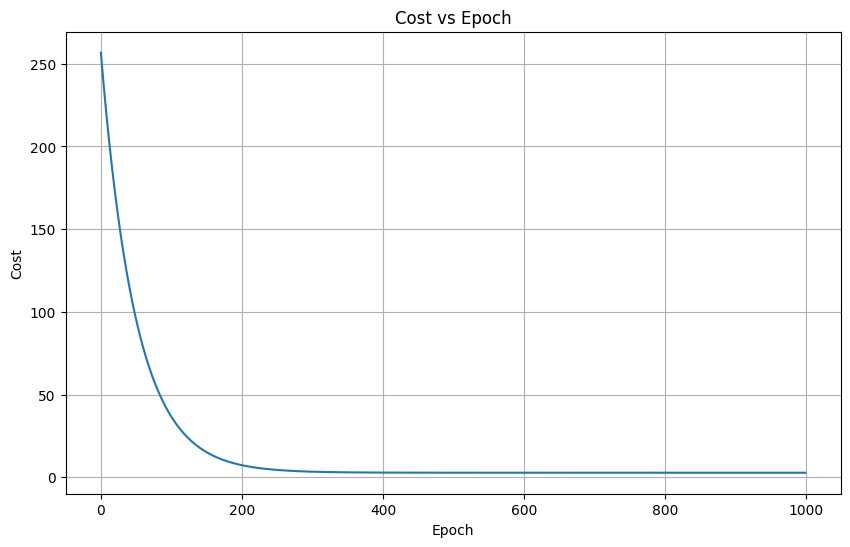

In [114]:
lr = 0.01
model = LinearRegression(learning_rate=lr)
# should use X_train
model.train(X_data, Y_data)

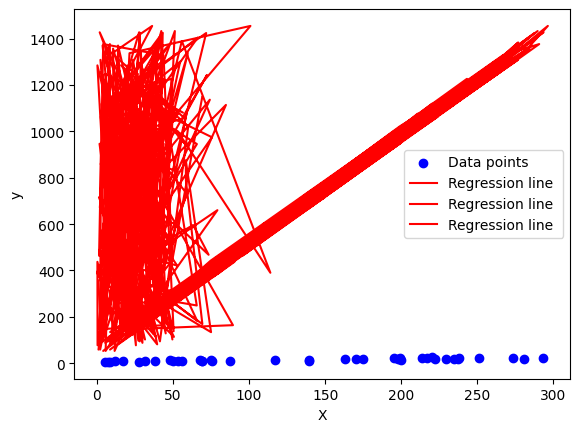

In [111]:
#???
plt.scatter(X_test[:, 0], Y_test, color="blue", label="Data points")
y_pred = model.predict(X)
# print(f"Predict: {y_pred}")
plt.plot (X, y_pred, color ="red", label ="Regression line ")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Day 20: 62 questions in 90 minutes